# Convolution Nets for MNIST

In [9]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

In [10]:
from keras.models import Sequential

In [11]:
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [12]:
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

In [13]:
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [14]:
path_to_dataset = "/home/ubuntu/deep-learning-keras-tensorflow/data/mnist.pkl.gz"

#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [15]:
X_test_orig = X_test

## Data Preparation

In [16]:
img_rows, img_cols = 28, 28
nb_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)


In [17]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


# A simple CNN

In [18]:
#Initializing the values for the convolution neural network
nb_epoch = 2
batch_size = 128
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

### Step 1: Model Definition

In [19]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### Step 2: Compile

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Step 3: Fit

In [22]:
model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=2,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 17s - loss: 0.4310 - acc: 0.8824 - val_loss: 0.3438 - val_acc: 0.9043
Epoch 2/2
60000/60000 [==============================] - 17s - loss: 0.3380 - acc: 0.9039 - val_loss: 0.3066 - val_acc: 0.9151


### Step 4: Evaluate

In [23]:
# Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.306580189207
Test accuracy: 0.9151


### Let's plot our model Predictions!

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

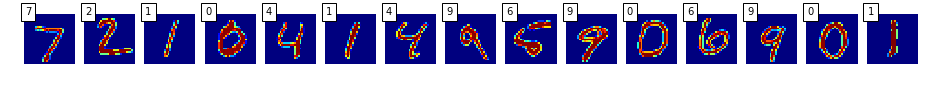

In [25]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [26]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 33s - loss: 0.6364 - acc: 0.8435 - val_loss: 0.3125 - val_acc: 0.9131
Epoch 2/2
60000/60000 [==============================] - 36s - loss: 0.2935 - acc: 0.9154 - val_loss: 0.2541 - val_acc: 0.9271


In [28]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.254064629307
Test accuracy: 0.9271


# Adding Dropout

In [30]:
import tensorflow as tf
tf.python.control_flow_ops = tf

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 33s - loss: 0.7506 - acc: 0.7880 - val_loss: 0.3171 - val_acc: 0.9136
Epoch 2/2
60000/60000 [==============================] - 35s - loss: 0.3861 - acc: 0.8894 - val_loss: 0.2442 - val_acc: 0.9299


In [32]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.244154857373
Test accuracy: 0.9299


# Adding more Convolution Layers

In [33]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 65s - loss: 1.2953 - acc: 0.5554 - val_loss: 0.3570 - val_acc: 0.8997
Epoch 2/2
60000/60000 [==============================] - 70s - loss: 0.5164 - acc: 0.8394 - val_loss: 0.2634 - val_acc: 0.9194


In [35]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.263389916217
Test accuracy: 0.9194


# Exercise

The above code has been written as a function. 

Change some of the **hyperparameters** and see what happens. 

In [39]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
    model.add(Activation('relu'))
    model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              nb_epoch=5,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [40]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 68s - loss: 1.1889 - acc: 0.6079 - val_loss: 0.3539 - val_acc: 0.9003
Epoch 2/5
60000/60000 [==============================] - 69s - loss: 0.4960 - acc: 0.8455 - val_loss: 0.2488 - val_acc: 0.9269
Epoch 3/5
60000/60000 [==============================] - 74s - loss: 0.4111 - acc: 0.8734 - val_loss: 0.2184 - val_acc: 0.9371
Epoch 4/5
60000/60000 [==============================] - 68s - loss: 0.3643 - acc: 0.8895 - val_loss: 0.1899 - val_acc: 0.9456
Epoch 5/5
60000/60000 [==============================] - 72s - loss: 0.3366 - acc: 0.8975 - val_loss: 0.1749 - val_acc: 0.9483
Test score: 0.174879870239
Test accuracy: 0.9483
1 loop, best of 1: 5min 58s per loop


# Batch Normalisation

Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

## How to BatchNorm in Keras

```python
from keras.layers.normalization import BatchNormalization

BatchNormalization(epsilon=1e-06, mode=0, 
                   axis=-1, momentum=0.99, 
                   weights=None, beta_init='zero', 
                   gamma_init='one')
```

In [38]:
# Try to add a new BatchNormalization layer to the Model 
# (after the Dropout layer)